In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer

In [2]:
print("tensorflow version:\t",tf.__version__)
print("numpy version:\t\t",np.__version__)
print("pandas version:\t\t",pd.__version__)

tensorflow version:	 2.15.0
numpy version:		 1.24.2
pandas version:		 1.5.3


In [3]:
used_cars = pd.read_csv("C:/Users/ACER/OneDrive/Jupyter Files/Machine-Learning-with-R-datasets/usedcars.csv")
used_cars.head()

,year,model,price,mileage,color,transmission
0,2011,SEL,21992,7413,Yellow,AUTO
1,2011,SEL,20995,10926,Gray,AUTO
2,2011,SEL,19995,7351,Silver,AUTO
3,2011,SEL,17809,11613,Gray,AUTO
4,2012,SE,17500,8367,White,AUTO


In [4]:
X = used_cars.drop(columns=['price'])
y = used_cars['price']
X, y

(     year model  mileage   color transmission
 0    2011   SEL     7413  Yellow         AUTO
 1    2011   SEL    10926    Gray         AUTO
 2    2011   SEL     7351  Silver         AUTO
 3    2011   SEL    11613    Gray         AUTO
 4    2012    SE     8367   White         AUTO
 ..    ...   ...      ...     ...          ...
 145  2006   SES    95000  Silver         AUTO
 146  2002    SE    87003     Red         AUTO
 147  2000    SE    96841     Red         AUTO
 148  2001    SE   151479  Yellow         AUTO
 149  2000    SE   109259     Red         AUTO
 
 [150 rows x 5 columns],
 0      21992
 1      20995
 2      19995
 3      17809
 4      17500
        ...  
 145     6200
 146     5995
 147     5980
 148     4899
 149     3800
 Name: price, Length: 150, dtype: int64)

In [5]:
ct = make_column_transformer((MinMaxScaler(),['year','mileage']),
                             (OneHotEncoder(handle_unknown='ignore'),['model','color','transmission'])
                            )
ct

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['year', 'mileage']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['model', 'color', 'transmission'])])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.10, random_state=42)
X_train.shape, X_test.shape

((135, 5), (15, 5))

In [7]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['year', 'mileage']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['model', 'color', 'transmission'])])

In [8]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

X_train_normal.shape

(135, 16)

In [107]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience= 10)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[16],activation='relu',kernel_initializer='normal'),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.Dense(100,activation='relu',kernel_initializer='normal'),
    tf.keras.layers.Dropout(0.01),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mse,
             optimizer=tf.keras.optimizers.Adamax(learning_rate=0.01),
             metrics=['mse'])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 100)               1700      
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_49 (Dense)            (None, 100)               10100     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_50 (Dense)            (None, 1)                 101       
                                                                 
Total params: 11901 (46.49 KB)
Trainable params: 11901 (46.49 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
history = model.fit(X_train_normal, y_train, epochs=1000, verbose=1, callbacks=[callback])

Epoch 1/1000
5/5 [==============================] - 1s 5ms/step - loss: 175673840.0000 - mse: 175673840.0000
Epoch 2/1000
5/5 [==============================] - 0s 4ms/step - loss: 175574016.0000 - mse: 175574016.0000
Epoch 3/1000
5/5 [==============================] - 0s 4ms/step - loss: 175337264.0000 - mse: 175337264.0000
Epoch 4/1000
5/5 [==============================] - 0s 4ms/step - loss: 174894832.0000 - mse: 174894832.0000
Epoch 5/1000
5/5 [==============================] - 0s 4ms/step - loss: 174137216.0000 - mse: 174137216.0000
Epoch 6/1000
5/5 [==============================] - 0s 4ms/step - loss: 172982688.0000 - mse: 172982688.0000
Epoch 7/1000
5/5 [==============================] - 0s 4ms/step - loss: 171236960.0000 - mse: 171236960.0000
Epoch 8/1000
5/5 [==============================] - 0s 5ms/step - loss: 169006992.0000 - mse: 169006992.0000
Epoch 9/1000
5/5 [==============================] - 0s 8ms/step - loss: 165907504.0000 - mse: 165907504.0000
Epoch 10/1000
5/5 [

In [105]:
model.evaluate(X_test_normal,y_test)

1/1 [==============================] - 0s 98ms/step - loss: 2767236.2500 - mse: 2767236.2500


[2767236.25, 2767236.25]

<Axes: >

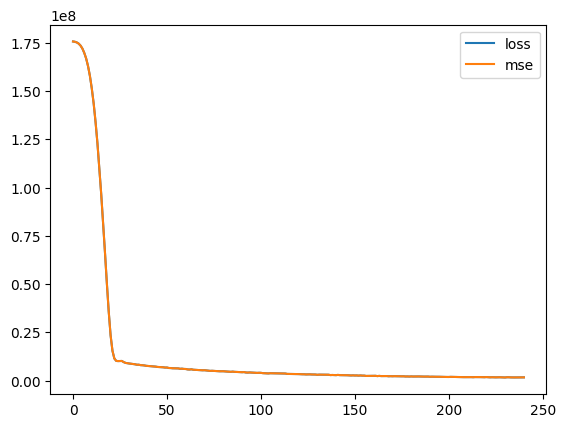

In [106]:
pd.DataFrame(history.history).plot()

In [102]:
y_pred = model.predict(X_test_normal)
tf.squeeze(y_pred) - y_test

1/1 [==============================] - 0s 52ms/step


<tf.Tensor: shape=(15,), dtype=float32, numpy=
array([ 2185.8086 ,  1650.8086 ,  -496.95898,   387.84375, -1105.7783 ,
       -2708.1777 ,   231.01465,  2765.79   , -1186.8945 , -1562.1016 ,
       -2122.6611 ,   424.70898,   243.81836, -2472.4033 ,  1028.543  ],
      dtype=float32)>